In [2]:
import pandas as pd
import numpy as np
import flatdict
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

# MODEL COMPARISON

In [3]:
exp_paths = [Path('./evaluation/super_resolution_freqs_out/').glob("*"),
            Path('./evaluation/super_resolution_freqs_in/').glob("*"),
            Path('./evaluation/super_resolution_baseline/').glob("*")
]

exp_dicts = []
for exp_dirs in exp_paths:
    for exp_dir in exp_dirs:

        path_to_res =   exp_dir / Path("results.pkl")
        if not path_to_res.exists():
            continue
        # load config file
        with open(path_to_res, 'rb') as fdtype:
            results = pickle.load(fdtype)
        conf = dict(flatdict.FlatDict(results['conf'], delimiter='.'))
        res = dict(flatdict.FlatDict(results['metrics'], delimiter='.'))
        del res['val.rmse_phase_freq']
        del res['diff.rmse_phase_freq']
        del res['test.rmse_phase_freq']
        del res['val.lsd_freq']
        del res['diff.lsd_freq']
        del res['test.lsd_freq']
        del conf['exp_dir']
        conf["dir"] = exp_dir.name.split("_")[-1]
        exp_dicts.append( conf | res )

In [4]:
df = pd.DataFrame(exp_dicts)
df

,data_h5,seed,ds,grid_type,grid_pattern,model,n_mics,batch_size,epochs,monitor_metric,...,diff.rmse_phase,diff.rmse_time,diff.lsd,diff.coherence,test.rmse_phase,test.rmse_time,test.lsd,test.coherence,test.time,train.time
0,Easycom_N-1020_fs-48k_nrfft-257.h5,666,90,random,checkboard,dnn,6,18,2000,loss,...,1.397489,0.410366,4.155360,0.080704,1.247130,0.301622,2.722553,0.044413,0.197427,1305.465663
1,Easycom_N-1020_fs-48k_nrfft-257.h5,666,60,random,checkboard,dnn,6,18,2000,loss,...,1.440839,0.459330,4.387731,0.105654,1.109480,0.320188,3.032490,0.051380,0.206458,2122.813645
2,Easycom_N-1020_fs-48k_nrfft-257.h5,666,15,random,checkboard,dnn,6,18,2000,loss,...,2.037747,1.082948,7.996405,0.498961,1.906732,1.007565,7.452716,0.432676,0.289688,1398.951879
3,Easycom_N-1020_fs-48k_nrfft-257.h5,666,15,random,checkboard,dnn,6,18,2000,loss,...,2.048195,1.058311,8.011869,0.495231,1.919041,0.984681,7.468743,0.429712,0.277034,1377.737649
4,Easycom_N-1020_fs-48k_nrfft-257.h5,666,75,random,checkboard,dnn,6,18,2000,loss,...,1.461809,0.489821,4.249896,0.101610,0.999661,0.280597,2.524910,0.034041,0.321873,1275.304427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Easycom_N-1020_fs-48k_nrfft-257.h5,666,75,random,checkboard,dnn,6,18,2000,loss,...,2.191707,1.084490,16.190558,0.735699,2.110811,0.974329,16.258451,0.603571,0.054464,471.712692
104,Easycom_N-1020_fs-48k_nrfft-257.h5,666,45,random,checkboard,scf,6,18,2000,loss,...,2.156222,1.098642,6.367122,0.617974,1.604885,0.814867,4.722517,0.339963,3.813838,0.000021
105,Easycom_N-1020_fs-48k_nrfft-257.h5,666,90,random,checkboard,scf,6,18,2000,loss,...,2.040191,1.038323,6.965852,0.567077,0.672511,0.328754,2.205532,0.056849,2.411886,0.000018
106,Easycom_N-1020_fs-48k_nrfft-257.h5,666,30,random,checkboard,dnn,6,18,2000,loss,...,2.204336,1.111605,17.292045,0.854273,2.160759,1.069946,17.323597,0.775061,0.165907,397.035437


In [5]:
df.keys()

Index(['data_h5', 'seed', 'ds', 'grid_type', 'grid_pattern', 'model', 'n_mics',
       'batch_size', 'epochs', 'monitor_metric', 'architecture', 'do_svect',
       'do_bar', 'do_calib', 'do_delay', 'do_freqs_in', 'lr', 'lars',
       'hidden_dim', 'hidden_num', 'do_skip', 'scale_ang', 'scale_freq',
       'loss_mag_lam', 'loss_phase_lam', 'loss_atf_lam', 'loss_air_lam',
       'loss_caus_lam', 'loss_caus_crit', 'loss_rft_lam', 'dir',
       'val.rmse_phase', 'val.rmse_time', 'val.lsd', 'val.coherence',
       'val.time', 'diff.rmse_phase', 'diff.rmse_time', 'diff.lsd',
       'diff.coherence', 'test.rmse_phase', 'test.rmse_time', 'test.lsd',
       'test.coherence', 'test.time', 'train.time'],
      dtype='object')

In [6]:
df = df.loc[:,df.apply(pd.Series.nunique) != 1 ]
# df = df.loc[df["training.train_val_split_perc"] == 80]
df = df.sort_values(by=["test.rmse_time"])
print(df.keys())
df

Index(['ds', 'model', 'batch_size', 'architecture', 'do_svect', 'do_bar',
       'do_calib', 'do_delay', 'do_freqs_in', 'loss_mag_lam', 'loss_phase_lam',
       'loss_atf_lam', 'loss_air_lam', 'loss_caus_lam', 'loss_caus_crit',
       'loss_rft_lam', 'dir', 'val.rmse_phase', 'val.rmse_time', 'val.lsd',
       'val.coherence', 'val.time', 'diff.rmse_phase', 'diff.rmse_time',
       'diff.lsd', 'diff.coherence', 'test.rmse_phase', 'test.rmse_time',
       'test.lsd', 'test.coherence', 'test.time', 'train.time'],
      dtype='object')


,ds,model,batch_size,architecture,do_svect,do_bar,do_calib,do_delay,do_freqs_in,loss_mag_lam,...,diff.rmse_phase,diff.rmse_time,diff.lsd,diff.coherence,test.rmse_phase,test.rmse_time,test.lsd,test.coherence,test.time,train.time
9,90,dnn,18,SIREN_PHASE_CASCADE,1,1,1,1,0,1.0,...,1.332588,0.386099,3.926932,0.071940,0.900068,0.166152,1.826188,0.014098,0.298422,2653.109465
18,90,dnn,18,SIREN_PHASE_CASCADE,1,1,1,1,0,1.0,...,1.340008,0.410996,4.008966,0.076987,0.866110,0.178495,1.848597,0.014869,0.268359,2383.189396
29,90,dnn,18,SIREN_PHASE,1,1,1,1,0,1.0,...,1.429489,0.421051,4.128144,0.083876,0.888876,0.183892,1.955534,0.016439,0.222668,2116.168633
43,90,dnn,18,SIREN_PHASE_CASCADE,1,1,1,1,0,1.0,...,1.335415,0.403481,3.862348,0.073958,0.934531,0.188374,1.911874,0.016460,0.365468,1833.324811
44,90,dnn,18,SIREN_PHASE,1,1,1,1,0,1.0,...,1.451495,0.456795,4.052322,0.101263,0.875212,0.193817,1.931384,0.018626,0.234495,1998.384449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,15,dnn,18,SIREN,0,0,0,0,0,0.0,...,2.155641,1.148110,18.152447,0.910381,2.131005,1.120151,18.132891,0.861291,0.201165,345.896316
17,15,dnn,18,SIREN_PHASE,1,1,1,1,0,1.0,...,2.188749,1.212755,8.466516,0.595642,2.062549,1.131016,7.902306,0.518208,0.130156,1062.243463
7,15,dnn,18,SIREN_PHASE,1,1,1,1,0,1.0,...,2.182334,1.226555,8.455922,0.597826,2.038398,1.142213,7.879908,0.519369,0.265399,2013.764220
76,15,dnn,48,SIREN_PHASE,1,1,1,1,1,1.0,...,2.337895,1.201681,13.234738,0.752963,2.269707,1.163502,12.525535,0.692558,3.942217,929.944112


In [7]:
n_mics = 6
df_freqs_in = df.loc[(df["do_freqs_in"] == 1) 
                # & (df["ds"] != 2)
]
df_freqs_out = df.loc[(df["do_freqs_in"] == 0) 
                # & (df["n_mics"] == n_mics) 
                # & (df["ds"] != 2)
]

print(df_freqs_in.keys())
df_freqs_out["loss_caus_lam"]

Index(['ds', 'model', 'batch_size', 'architecture', 'do_svect', 'do_bar',
       'do_calib', 'do_delay', 'do_freqs_in', 'loss_mag_lam', 'loss_phase_lam',
       'loss_atf_lam', 'loss_air_lam', 'loss_caus_lam', 'loss_caus_crit',
       'loss_rft_lam', 'dir', 'val.rmse_phase', 'val.rmse_time', 'val.lsd',
       'val.coherence', 'val.time', 'diff.rmse_phase', 'diff.rmse_time',
       'diff.lsd', 'diff.coherence', 'test.rmse_phase', 'test.rmse_time',
       'test.lsd', 'test.coherence', 'test.time', 'train.time'],
      dtype='object')


9      1.0
18     0.0
29     1.0
43     0.0
44     1.0
41     0.0
23     0.0
33     1.0
47     1.0
20     1.0
42     0.0
32     0.0
16     0.0
4      0.0
15     1.0
0      1.0
1      1.0
27     1.0
105    0.0
8      0.0
19     0.0
14     1.0
36     0.0
39     0.0
31     1.0
22     1.0
21     0.0
40     1.0
34     0.0
45     1.0
100    0.0
6      0.0
25     0.0
10     1.0
28     0.0
13     1.0
37     1.0
35     0.0
102    0.0
5      1.0
12     0.0
30     1.0
11     0.0
104    0.0
96     0.0
107    0.0
103    0.0
3      1.0
99     0.0
2      0.0
26     0.0
97     0.0
24     1.0
106    0.0
38     1.0
101    0.0
98     0.0
17     1.0
7      0.0
46     0.0
Name: loss_caus_lam, dtype: float64

In [8]:
sns.set_theme()
sns.set_context("paper", font_scale=1.2, rc={"lines.linewidth": 2.5, 'font.family':'serif'})

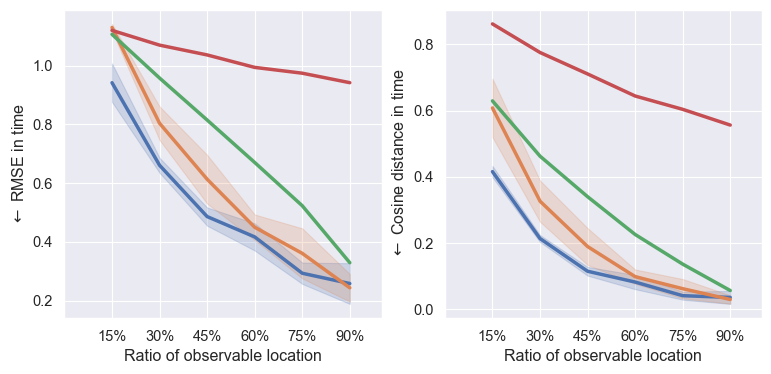

In [16]:
curr_df = df.loc[   ((df["loss_air_lam"] == 1) & (df["loss_caus_lam"] == 0))
                    | (df["architecture"].isin(['SIREN', "SCF"])
                    # & (df["do_freqs_in"] == 0)
                  )
]


metrics = ["test.rmse_time", "test.coherence"]
metric_names = [r"$\leftarrow$ RMSE in time", r"$\leftarrow$ Cosine distance in time"]
fig, axarr = plt.subplots(1, len(metrics), figsize = (9,4))
for m, metric in enumerate(metrics):
    sns.lineplot(data=curr_df, x="ds", y=metric, hue="architecture", ax=axarr[m])
    axarr[m].set_ylabel(metric_names[m])
    axarr[m].set_xlabel("Ratio of observable location")
    axarr[m].set(xticks=[15,30,45,60,75,90], xticklabels=[f"{perc}%" for perc in [15,30,45,60,75,90]])
    axarr[m].set_xlim([0,100])

axarr[0].legend([],[], frameon=False)
axarr[1].legend([],[], frameon=False)
# plt.legend(loc='upper center', bbox_to_anchor=(-0.1, 1.20), ncol=4)
plt.savefig("figures/super_resolution_test.png", dpi=150)

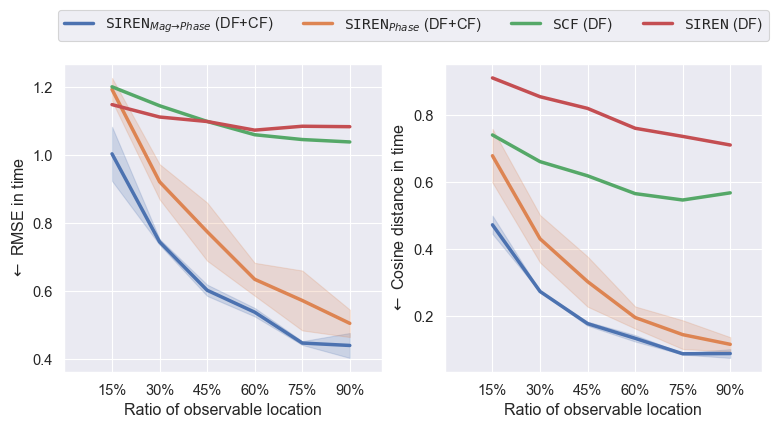

In [17]:
curr_df = df.loc[   ((df["loss_air_lam"] == 1) & (df["loss_caus_lam"] == 0))
                    | (df["architecture"].isin(['SIREN', "SCF"])
                    # & (df["do_freqs_in"] == 0)
                  )
]

curr_df = curr_df.replace("SIREN_PHASE_CASCADE", value=r"$\mathtt{SIREN}_{{Mag}\to{Phase}}$ (DF+CF)")
curr_df = curr_df.replace("SIREN_PHASE", value=r"$\mathtt{SIREN}_{Phase}}$ (DF+CF)")
curr_df = curr_df.replace("SIREN", value=r"$\mathtt{SIREN}$ (DF)")
curr_df = curr_df.replace("SCF", value=r"$\mathtt{SCF}$ (DF)")

metrics = ["diff.rmse_time", "diff.coherence"]
metric_names = [r"$\leftarrow$ RMSE in time", r"$\leftarrow$ Cosine distance in time"]
fig, axarr = plt.subplots(1, len(metrics), figsize = (9,4))
for m, metric in enumerate(metrics):
    sns.lineplot(data=curr_df, x="ds", y=metric, hue="architecture", ax=axarr[m])
    axarr[m].set_ylabel(metric_names[m])
    axarr[m].set_xlabel("Ratio of observable location")
    axarr[m].set(xticks=[15,30,45,60,75,90], xticklabels=[f"{perc}%" for perc in [15,30,45,60,75,90]])
    axarr[m].set_xlim([0,100])

axarr[0].legend([],[], frameon=False)
plt.legend(loc='upper center', bbox_to_anchor=(-0.1, 1.20), ncol=4)

plt.savefig("figures/super_resolution_diff.png", dpi=150)